### Import the packages

In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import subprocess
import matplotlib.pyplot as plt

### Stack images in videos

In [11]:
# Variables
num = 3 # Number of images per second
fps = 30
width = height = 250
image_folder = 'lfw_balanced/male'
video_folder = 'lfw_3s_videos/original/male'

# Save the file names
names=[]

# Video parameters
aux=0
n_vid=0
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter(video_folder+'/'+np.str(n_vid)+'.mp4', fourcc, fps, (width,height))

for name in sorted(os.listdir(image_folder)):
    print(name)
    
    if aux >= fps*15:
        # Video initialization
        aux=0 # Control variable to pass to the next video
        n_vid+=1
        video = cv2.VideoWriter(video_folder+'/'+np.str(n_vid)+'.mp4', fourcc, fps, (width,height))
    
    if name.endswith(".jpg"):
        names.append(name)
        img = cv2.imread(os.path.join(image_folder, name))
        image = cv2.resize(img, (height, width), interpolation = cv2.INTER_AREA)
        
        for i in range(np.int(fps/num)):
            video.write(image)
            aux+=1
            
    

/tmp/ipykernel_4706/2449380519.py:15: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  video = cv2.VideoWriter(video_folder+'/'+np.str(n_vid)+'.mp4', fourcc, fps, (width,height))
/tmp/ipykernel_4706/2449380519.py:31: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20

Aaron_Peirsol_0001.jpg
Aaron_Peirsol_0002.jpg
Aaron_Peirsol_0003.jpg
Aaron_Peirsol_0004.jpg
Abel_Aguilar_0001.jpg
Abel_Aguilar_0002.jpg
Abel_Aguilar_0003.jpg
Abel_Aguilar_0004.jpg
Abraham_Foxman_0001.jpg
Abraham_Foxman_0002.jpg
Abraham_Foxman_0003.jpg
Abraham_Foxman_0004.jpg
Adam_Sandler_0001.jpg
Adam_Sandler_0002.jpg
Adam_Sandler_0003.jpg
Adam_Sandler_0004.jpg
Adrien_Brody_0001.jpg
Adrien_Brody_0002.jpg
Adrien_Brody_0003.jpg
Adrien_Brody_0004.jpg
Ahmed_Chalabi_0001.jpg
Ahmed_Chalabi_0002.jpg
Ahmed_Chalabi_0003.jpg
Ahmed_Chalabi_0004.jpg
Aidan_Quinn_0001.jpg
Aidan_Quinn_0002.jpg
Aidan_Quinn_0003.jpg
Aidan_Quinn_0004.jpg
Al_Pacino_0001.jpg
Al_Pacino_0002.jpg
Al_Pacino_0003.jpg
Al_Pacino_0004.jpg
Alec_Baldwin_0001.jpg
Alec_Baldwin_0002.jpg
Alec_Baldwin_0003.jpg
Alec_Baldwin_0004.jpg
Alfonso_Cuaron_0001.jpg
Alfonso_Cuaron_0002.jpg
Alfonso_Cuaron_0003.jpg
Alfonso_Cuaron_0004.jpg
Allan_Houston_0001.jpg
Allan_Houston_0002.jpg
Allan_Houston_0003.jpg
Allan_Houston_0004.jpg
Andre_Agassi_0001.jp

LeBron_James_0001.jpg
LeBron_James_0002.jpg
LeBron_James_0003.jpg
LeBron_James_0004.jpg
Lee_Yuan-tseh_0001.jpg
Lee_Yuan-tseh_0002.jpg
Lee_Yuan-tseh_0003.jpg
Lee_Yuan-tseh_0004.jpg
Lennox_Lewis_0001.jpg
Lennox_Lewis_0002.jpg
Lennox_Lewis_0003.jpg
Lennox_Lewis_0004.jpg
Leon_Lai_0001.jpg
Leon_Lai_0002.jpg
Leon_Lai_0003.jpg
Leon_Lai_0004.jpg
Lester_Holt_0001.jpg
Lester_Holt_0002.jpg
Lester_Holt_0003.jpg
Lester_Holt_0004.jpg
Li_Changchun_0001.jpg
Li_Changchun_0002.jpg
Li_Changchun_0003.jpg
Li_Changchun_0004.jpg
Lindsey_Graham_0001.jpg
Lindsey_Graham_0002.jpg
Lindsey_Graham_0003.jpg
Lindsey_Graham_0004.jpg
Lionel_Richie_0001.jpg
Lionel_Richie_0002.jpg
Lionel_Richie_0003.jpg
Lionel_Richie_0004.jpg
Louis_Van_Gaal_0001.jpg
Louis_Van_Gaal_0002.jpg
Louis_Van_Gaal_0003.jpg
Louis_Van_Gaal_0004.jpg
Luis_Fonsi_0001.jpg
Luis_Fonsi_0002.jpg
Luis_Fonsi_0003.jpg
Luis_Fonsi_0004.jpg
Mahmoud_Abbas_0001.jpg
Mahmoud_Abbas_0002.jpg
Mahmoud_Abbas_0003.jpg
Mahmoud_Abbas_0004.jpg
Marcelo_Ebrard_0001.jpg
Marcelo_

In [13]:
np.shape(names)

(500,)

### Take a frame from each video

In [17]:
#### CHANGE IMAGE FOLDER ####

# Parameters
leng=15 # Video length
num = 3 # Number of images per second
n_im=num*leng # Number of images per video
sec=leng/n_im # Rate of new image
width = height = 250
dim=(width, height) # Final image dimentsion

# Video/image paths
video_folder = 'lfw_3s_videos/thinner_face/male'
image_folder = 'lfw_filters/thinner_face/male'  #### HERE ####
n=0 # Variable for image names

for name in sorted(os.listdir(video_folder)):
    aux=0 # Variable for video length
    image=[]
    
    if name.endswith(".MOV"):
        print(name)
        vid = cv2.VideoCapture(video_folder+'/'+name)
                
        #Define the images to be obtained (from which video instant)
        fps=vid.get(cv2.CAP_PROP_FPS)
        
        while aux<leng*fps:            
            
            for a in range(np.int(sec*fps)):
                ret, img = vid.read()
                aux+=1 # Control the while condition about video length
                
            file_name=np.str(names[n]) # Name of the images to be saved
            n+=1
            [height, width, channels]=np.shape(img)
            # Save cropped and resized image
            cv2.imwrite(image_folder+'/'+file_name, cv2.resize(img[np.int((height-width)/2):np.int((height-width)/2+width), :] , dim))


0.MOV


/tmp/ipykernel_4706/3155990797.py:29: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  for a in range(np.int(sec*fps)):
/tmp/ipykernel_4706/3155990797.py:33: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  file_name=np.str(names[n]) # N

01.MOV
02.MOV
03.MOV
04.MOV
05.MOV
06.MOV
07.MOV
08.MOV
09.MOV
10.MOV
11.MOV


IndexError: list index out of range

### Take I frames from each video

In [163]:
def get_frame_types(video_fn):
    command = 'ffprobe -v error -show_entries frame=pict_type -of default=noprint_wrappers=1'.split()
    out = subprocess.check_output(command + [video_fn]).decode()
    frame_types = out.replace('pict_type=','').split()
    return zip(range(len(frame_types)), frame_types)

def save_i_keyframes(video_fn, path):
    frame_types = get_frame_types(video_fn)
    i_frames = [x[0] for x in frame_types if x[1]=='I']
    if i_frames:
        basename = os.path.splitext(os.path.basename(video_fn))[0]
        cap = cv2.VideoCapture(video_fn)
        for frame_no in i_frames:
            cap.set(cv2.CAP_PROP_POS_FRAMES, frame_no)
            ret, frame = cap.read()
            outname = basename+'_i_frame_'+str(frame_no)+'.jpg'
            cv2.imwrite(path+'/'+outname, frame)
            print ('Saved: '+outname)
        cap.release()
    else:
        print ('No I-frames in '+video_fn)

In [7]:
# Video/image paths
src_video_folder = 'videos'
dst_video_folder = 'i_frames'

for video_name in sorted(os.listdir(src_video_folder)):
    print(video_name)

    filename = src_video_folder+'/'+video_name
    save_i_keyframes(filename, dst_video_folder)

0.MOV
Saved: 0_i_frame_0.jpg
Saved: 0_i_frame_31.jpg
Saved: 0_i_frame_60.jpg
Saved: 0_i_frame_91.jpg
Saved: 0_i_frame_120.jpg
Saved: 0_i_frame_151.jpg
Saved: 0_i_frame_180.jpg
Saved: 0_i_frame_211.jpg
Saved: 0_i_frame_240.jpg
Saved: 0_i_frame_271.jpg
Saved: 0_i_frame_300.jpg
Saved: 0_i_frame_331.jpg
Saved: 0_i_frame_360.jpg
Saved: 0_i_frame_391.jpg
Saved: 0_i_frame_420.jpg
01.MOV
Saved: 01_i_frame_0.jpg
Saved: 01_i_frame_31.jpg
Saved: 01_i_frame_60.jpg
Saved: 01_i_frame_91.jpg
Saved: 01_i_frame_120.jpg
Saved: 01_i_frame_151.jpg
Saved: 01_i_frame_180.jpg
Saved: 01_i_frame_211.jpg
Saved: 01_i_frame_240.jpg
Saved: 01_i_frame_271.jpg
Saved: 01_i_frame_300.jpg
Saved: 01_i_frame_331.jpg
Saved: 01_i_frame_360.jpg
Saved: 01_i_frame_391.jpg
Saved: 01_i_frame_420.jpg
02.MOV
Saved: 02_i_frame_0.jpg
Saved: 02_i_frame_31.jpg
Saved: 02_i_frame_60.jpg
Saved: 02_i_frame_91.jpg
Saved: 02_i_frame_120.jpg
Saved: 02_i_frame_151.jpg
Saved: 02_i_frame_180.jpg
Saved: 02_i_frame_211.jpg
Saved: 02_i_frame_240.

Saved: 21_i_frame_0.jpg
Saved: 21_i_frame_31.jpg
Saved: 21_i_frame_60.jpg
Saved: 21_i_frame_91.jpg
Saved: 21_i_frame_120.jpg
Saved: 21_i_frame_151.jpg
Saved: 21_i_frame_180.jpg
Saved: 21_i_frame_211.jpg
Saved: 21_i_frame_240.jpg
Saved: 21_i_frame_271.jpg
Saved: 21_i_frame_300.jpg
Saved: 21_i_frame_331.jpg
Saved: 21_i_frame_360.jpg
Saved: 21_i_frame_391.jpg
Saved: 21_i_frame_420.jpg
22.MOV
Saved: 22_i_frame_0.jpg
Saved: 22_i_frame_31.jpg
Saved: 22_i_frame_60.jpg
Saved: 22_i_frame_91.jpg
Saved: 22_i_frame_120.jpg
Saved: 22_i_frame_151.jpg
Saved: 22_i_frame_180.jpg
Saved: 22_i_frame_211.jpg
Saved: 22_i_frame_240.jpg
Saved: 22_i_frame_271.jpg
Saved: 22_i_frame_300.jpg
Saved: 22_i_frame_331.jpg


## Image substraction

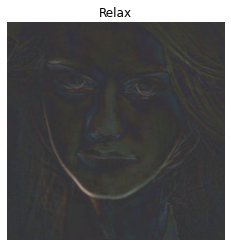

In [14]:
# Read the two images
image1 = cv2.imread('FFMF_VIP/sc_original/008_f.jpg')
image2 = cv2.imread('FFMF_VIP/sc_mellow_glow/008_f.jpg')

# Check if the images are loaded correctly
if image1 is None or image2 is None:
    print("Error: Image not loaded.")
    exit()

# Compute the absolute difference between the two images
diff = cv2.absdiff(image1, image2)

# Display the difference image

plt.imshow(cv2.cvtColor(50+diff, cv2.COLOR_BGR2RGB))
plt.title("Relax")
plt.axis('off')
plt.show()